![cartopy_logo](https://scitools.org.uk/cartopy/docs/latest/_images/sphx_glr_logo_001.png)

Cartopy is a Python package designed for **geospatial data processing in order to produce maps and other geospatial data analyses**.

Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

You will find cartopy especially useful for large area / small scale data, where Cartesian assumptions of spherical data traditionally break down. If you’ve ever experienced a singularity at the pole or a cut-off at the dateline, it is likely you will appreciate cartopy’s unique features!

### Some definitions

|Name|Definition|
|---|---|
|Projection| a transformation from spherical to 2D cartesian coordinates|
| CRS | Coordinate Reference System (Projection)|
|EPSG | Geodetic Parameter Dataset. A numeric value that calls projection/crs definitions from a public registry of projections |
|proj4_params| iterable of key-value pairs. The proj4 parameters required to define the desired CRS.  The parameters should not describe the desired elliptic model, instead create an appropriate Globe instance. The ``proj4_params`` parameters will override any parameters that the Globe defines.
|Ellipsoid| the modelled shape of the geoid|
|Datum| An ellipsoid and a spatial reference to locate the center of the ellipsoid with respect to Earth (often relative to a well defined datum, such as WGS84)|
|Globe| an encapsulation of the datum and/or ellipsoid in Cartopy|
|Meridian| a line of constant longitude|
|Parallel| a line of constant latitude|
|Gridlines / Graticule| a collection of meridians and parallels|
|Cylindrical (projection)| a transformation for spherical to cartesian coordinates using a cylinder as the developable surface. Parallels cross meridians at right angles. The antimeridian is a straight line.|
|Azimuthal (projection)| a transformation for spherical to cartesian coordinates using a plane as the developable surface. Parallels are complete circles. Great circles from central point are straight lines.|
|Conic (projection)| a transformation for spherical to cartesian coordinates using a cone as the| developable surface. Meridians are straight equally-spaced lines, parallels are circular arcs.|
|Pseudocylindrical (projection)| Lines of latitude are parallel straight lines and meridians are curved lines|
|Conformal| preserving shape|
|Equal-area| preserving area|
|Equidistant| preserving distance from some standard point or line |

Cartopy has exposed an interface to enable easy map creation using matplotlib. Creating a basic map is as simple as telling matplotlib to use a specific map projection, and then adding some coastlines to the axes.

### Cartopy Fundamentals - Coordinate Rerence System (CRS)

**Handles projections**

A central utility of the cartopy package is the ability to define, and transform data among, cartographic projections. The cartopy.crs module (CRS = coordinate reference system a.k.a. projection) defines a set of projections which are useful in defining the desired projection of a plot. These projections augment the machinery of matplotlib to allow for geospatial plots.

How do I call it?
`import cartopy.crs as ccrs`

    Above is common convention for loading in cartopy coordinate reference system (ccrs) functions

In [8]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Let's check out an example of what ccrs functions can do

In [26]:
help(ccrs.PlateCarree())

Help on PlateCarree in module cartopy.crs object:

class PlateCarree(_CylindricalProjection)
 |  The abstract class which denotes cylindrical projections where we
 |  want to allow x values to wrap around.
 |  
 |  Method resolution order:
 |      PlateCarree
 |      _CylindricalProjection
 |      _RectangularProjection
 |      Projection
 |      cartopy._crs.CRS
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, central_longitude=0.0, globe=None)
 |      Parameters
 |      ----------
 |      proj4_params: iterable of key-value pairs
 |          The proj4 parameters required to define the
 |          desired CRS.  The parameters should not describe
 |          the desired elliptic model, instead create an
 |          appropriate Globe instance. The ``proj4_params``
 |          parameters will override any parameters that the
 |          Globe defines.
 |      globe: :class:`~cartopy.crs.Globe` instance, optional
 |          If omitted, the default Globe inst

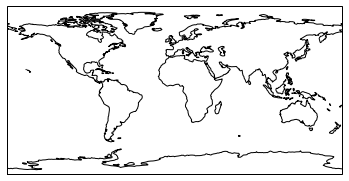

In [20]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

    | Above we declare our axes to be of the ccrs.PlateCarree() (which is just latitude/longitude) projection. On those axes defined in that projection, we can add coastlines(), another cartopy function with built in coastline data. 

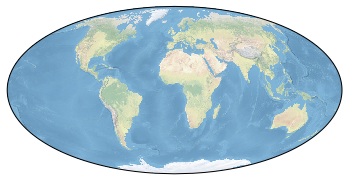

In [21]:
plt.figure()
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()

    | Above we declare our axes to be of ccrs.Mollweide() projection. We use cartopy's stock_img() function to fill the axes with a quasi-true color stock image from cartopy. 

Text(80.23, 16.61, 'Delhi')

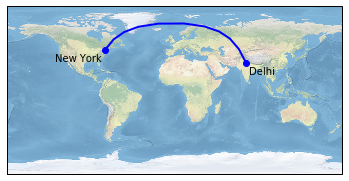

In [22]:
ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )
plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

Text(80.23, 16.61, 'Delhi')

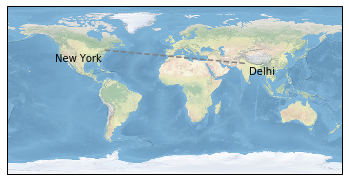

In [23]:
ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

    Notice the difference in how the dots are connected. It all comes down the the `transform` argument within the `plt.plot` . We are declaring different data projections even though they're both just points. 
    
    By default, the coordinate system of any data added to a GeoAxes is the same as the coordinate system of the GeoAxes itself, to control which coordinate system that the given data is in, you can add the transform keyword with an appropriate cartopy.crs.CRS instance

### Cartopy Fundamentals - Features (cfeatures)

**Adds GeoSpatial Features**

Cartopy also contains a module for accessing geospatial data files, like shapefiles or GeoJSON. It has a convenient set of data loaders for adding context to maps (like coastlines, borders, place names, etc.). We’ll use this module in the example below.

How do I call it?
`import cartopy.feature as cf  `

    Above is common convention for loading in cartopy features (cf) functions. The other way you'll see programmer's call it is as `cfeature`. Either is fine.

| Function | Definition |
| --- | --- |
|cf.BORDERS	|Country boundaries
|cf.COASTLINE	|Coastline, including major islands
|cf.LAKES|	Natural and artificial lakes
|cf.LAND	|Land polygons, including major islands
|cf.OCEAN	|Ocean polygons
|cf.RIVERS	|Single-line drainages, including lake centerlines
|cf.STATES	|(limited to the United States at this scale)

Text(0.5, 1.0, 'Title')

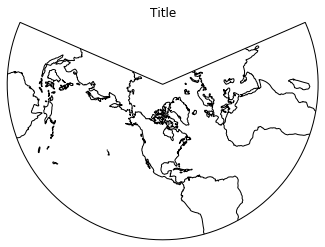

In [24]:
import cartopy.feature as cf

plt.figure()
ax = plt.axes(projection = ccrs.LambertConformal())  
ax.add_feature(cf.COASTLINE)                 
ax.set_title("Title")  

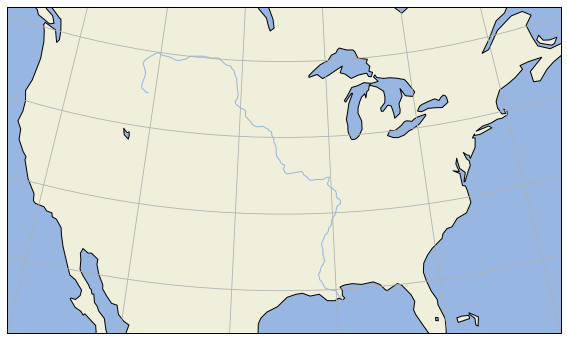

In [30]:
import numpy as np
import cartopy.feature as cf

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND, edgecolor='black')
ax.add_feature(cf.LAKES, edgecolor='black')
ax.add_feature(cf.RIVERS)
ax.gridlines()

If we want higher-resolution features, Cartopy can automatically download and create them from the Natural Earth Data database or the GSHHS dataset database.

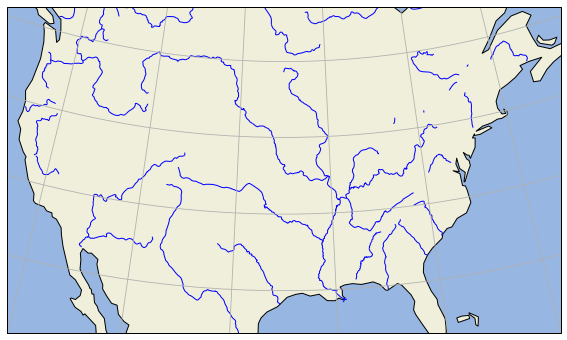

In [32]:
rivers_50m = cf.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

# Hurricane Katrina Path

### Load in our packages

In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader


### Define our lat and lons from the HURDAT2 dataset

In [2]:
#HURDAT2 dataset from AOML/NOAA:
#http://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.


lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
        -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
        -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
        -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
        -85.3, -82.9]

lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
        25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
        25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
        35.6, 37.0, 38.6, 40.1]

### Define a plotting function that will vary the color of particular states given the following conditions

In [6]:
def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    if geometry.intersects(track):
        facecolor = 'red'
    elif geometry.intersects(track_buffer):
        facecolor = '#FF7E00'
    return {'facecolor': facecolor, 'edgecolor': 'black'}

    Note that this function will be called below to help color states

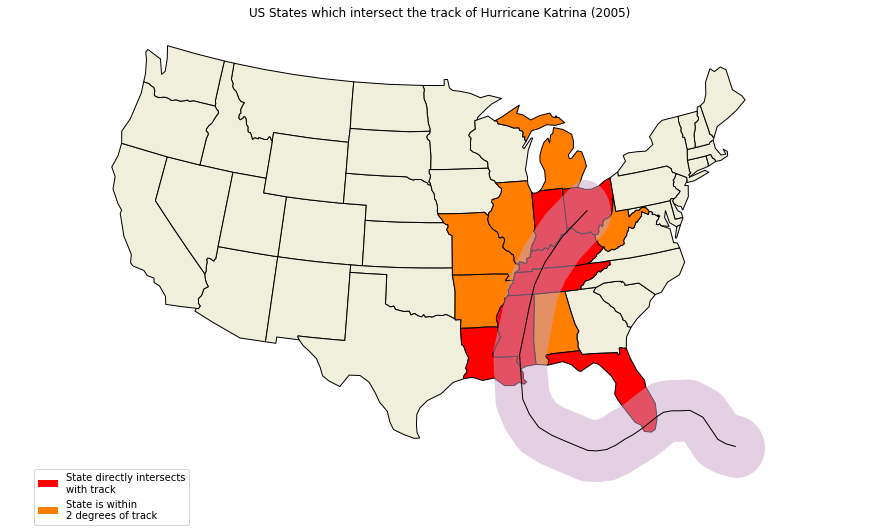

In [7]:
# Chunk 1
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

# Chunk 2
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.set_title('US States which intersect the track of '
             'Hurricane Katrina (2005)')

# Chunk 3
track = sgeom.LineString(zip(lons, lats))
track_buffer = track.buffer(2)

# Chunk 4
ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)

ax.add_geometries([track_buffer], ccrs.PlateCarree(),
                  facecolor='#C8A2C8', alpha=0.5)
ax.add_geometries([track], ccrs.PlateCarree(),
                  facecolor='none', edgecolor='k')

# Chunk 5
direct_hit = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
within_2_deg = mpatches.Rectangle((0, 0), 1, 1, facecolor="#FF7E00")
labels = ['State directly intersects\nwith track',
          'State is within \n2 degrees of track']
ax.legend([direct_hit, within_2_deg], labels,
          loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)


### Let's run through this chunk by chunk and describe what's happening:

1) Create the figure object. Create the axes object with specified projection. Set the extent of the axes so we don't plot the entire world or whatever the default is. Load in our shapefile that is within the Cartopy package library (aka it's already downloaded and we don't need to point it to a path, cartopy looks in it's own library folder automatically)

2) to get the effect of having just the states without a map "background" turn off the outline and background patches

3) turn the lons and lats into a shapely LineString. Then, buffer the linestring by two degrees (note: this is a non-physical distance)

4) We add geometries to the plot aka we add in the state shapelines from our state shapefile. Notice the color selection via `styler` is `colorize_state` ! This is where we use our function to roll through the states shape file (that has lat/lons) and if the state bounding box is intersected by the Katrina path then color it accordingly. Then we add the track line (track) and the track buffer (the within 2 degrees note from above). Notice the `alpha=0.5` argument, which gives the path transparency. 

5) make two proxy artists to add to a legend

    Note that this is a more complex plotting procedure, but I felt it was useful to see more examples of what Cartopy can do

# Adding data to a cartopy plot

#### Let's create some sample data and plot a contour plot

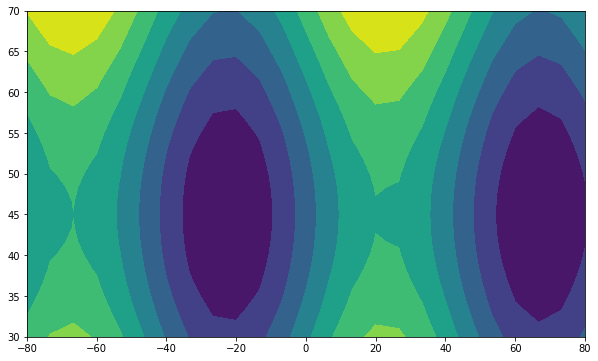

In [43]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

plt.figure(figsize=(10,6))
plt.contourf(lon2d, lat2d, data)

#### Now let's overlay this onto a cartopy plot with geospatial axes

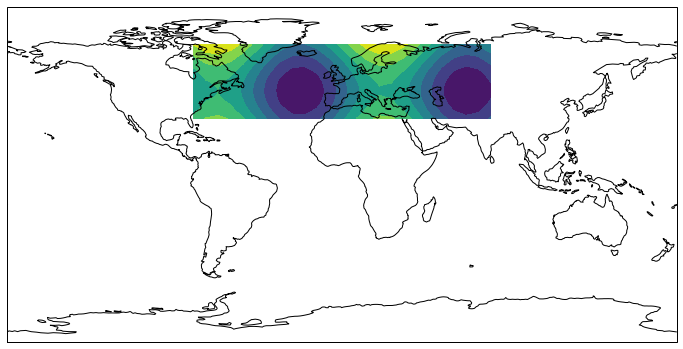

In [46]:
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

    We created a PlateCarree projection and plot the data on it without any transform keyword. This happens to work because PlateCarree is the simplest projection of lat / lon data.

#### Try this with a more complex projection

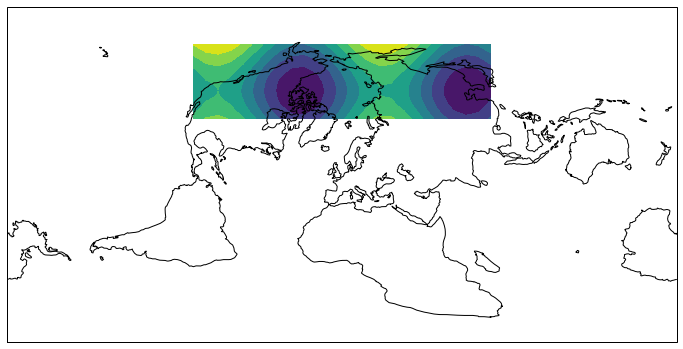

In [45]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)

plt.figure(figsize=(12,8))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

**This is wrong!** why? Because we need to add in the ``transform`` argument because our data comes in a different projection. 

**You can plot in whatever projection you want so long as the data is *transformed* to the projection of the plot!**

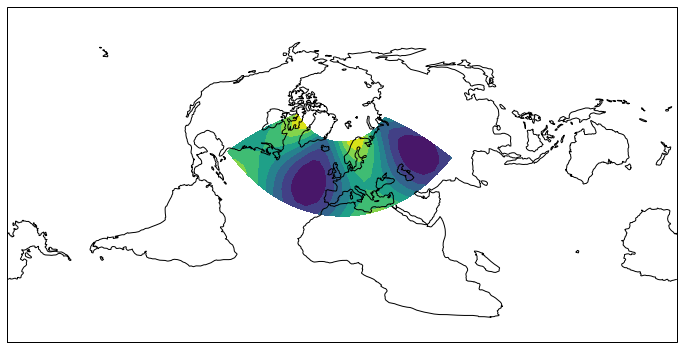

In [44]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)

plt.figure(figsize=(12,8))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

    Much better!

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

# load in a built-in tutorial dataset from xarray
ds = xr.tutorial.load_dataset('air_temperature')

ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [20]:
# convert this to fahrenheit

ds['air'].values = (ds['air'].values - 273.15)*(9/5) + 32

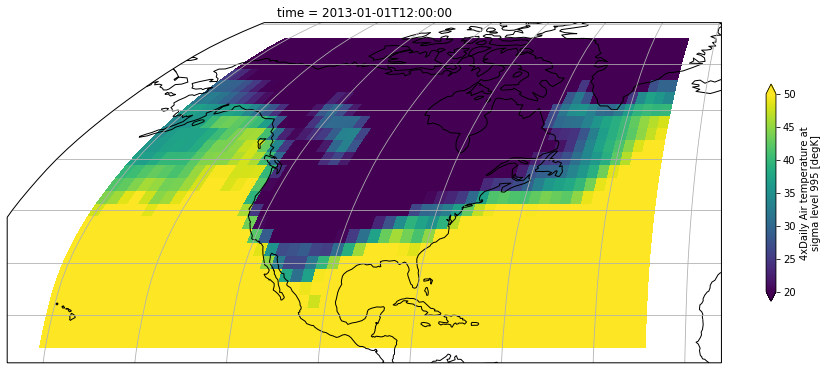

In [21]:
# select one time slice - create separate object and call it airtemp

airtemp = ds.air.sel(time='2013-01-01 12:00', method='nearest')


fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
airtemp.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=20, vmax=50, cbar_kwargs={'shrink': 0.4}) # cbar_kwargs={'shrink': 0.4} just shrinks the colorbar 

Note that I know the initial dataset comes in ccrs.PlateCarree(), hence the `transform=ccrs.PlateCarree()` argument . We'll learn how to get python to tell us what the projection is in the future

### Let's choose a better colormap instead of blue green yellow

##### Link to the default matplotlib colormaps

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

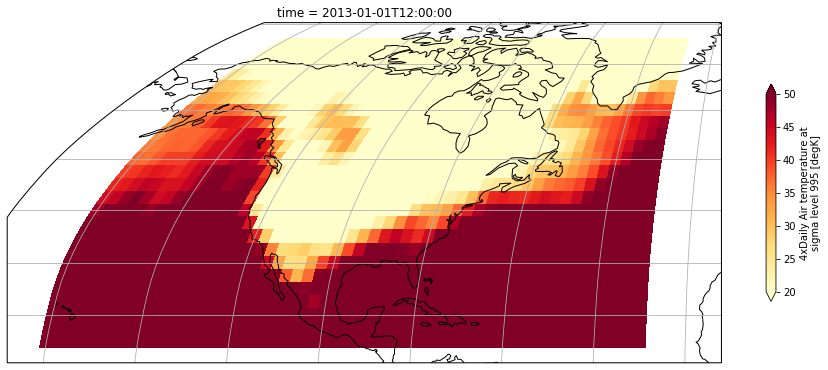

In [28]:
from matplotlib import cm #import colormap module from the matplotlib library


new_cmap = cm.get_cmap('YlOrRd') # Yellow orange red colormap 


fig = plt.figure(figsize=(16,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
airtemp.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=20, vmax=50, cbar_kwargs={'shrink': 0.4}, cmap=new_cmap) # notice the cmap argument

# Cartopy Assignment

#### 1) Download treecov.nc from the datasets folder (https://github.com/jsimkins2/geog473-673/blob/master/datasets/treecov.nc)

#### 2) Use xarray to open dataset (xr.open_dataset). 

In [1]:
import xarray as xr

treeData = xr.open_dataset("/Users/james/Downloads/treecov.nc")

#### 3) Remove bad values (values below 0%). (hint: xarray.where() function)

#### 4) Plot TreeCover percentage of North America with a green colormap

#### 5) Plot as `ccrs.LambertConformal()` (treecov.nc comes as `ccrs.PlateCarree()` )

#### 6) Submit resulting plot to Canvas - Cartopy Assignment